In [55]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, losses

(60000, 28, 28)

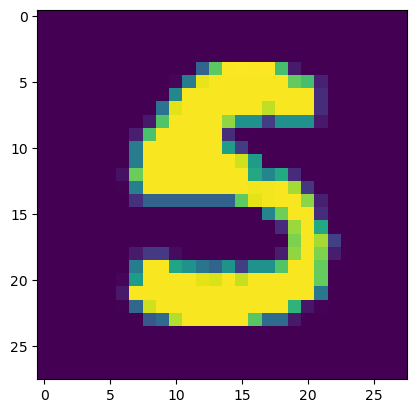

In [56]:
# Obtain mnist dataset, print example
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
plt.imshow(x_train[1997])
x_train.shape

In [57]:
# Add padding to 8x8 image
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255
x_train.shape

TensorShape([60000, 32, 32])

In [58]:
# Expand tensor dimension to 3
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train.shape

TensorShape([60000, 32, 32, 1])

In [59]:
# Remove last 2000 images from dataset, used only for validation
x_val = x_train[-2000:, :, :, :]
y_val = y_train[-2000:]
x_train = x_train[:-2000, :, :, :]
y_train = y_train[:-2000]


In [72]:
model = models.Sequential()

model.add(layers.Conv2D(6, 5, activation='tanh', input_shape=x_train.shape[1:]))

model.add(layers.AveragePooling2D(2))

model.add(layers.Activation('sigmoid'))

model.add(layers.Conv2D(16, 5, activation='tanh'))

model.add(layers.AveragePooling2D(2))

model.add(layers.Activation('sigmoid'))

model.add(layers.Conv2D(120, 5, activation='tanh'))

model.add(layers.Flatten())

model.add(layers.Dense(84, activation='tanh'))

model.add(layers.Dense(10, activation='softmax'))

In [73]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=64, epochs=30, validation_data=(x_val, y_val))

Epoch 1/30
907/907 [==============================] - 25s 27ms/step - loss: 1.4456 - accuracy: 0.4747 - val_loss: 0.3008 - val_accuracy: 0.9170
Epoch 2/30
907/907 [==============================] - 23s 25ms/step - loss: 0.3482 - accuracy: 0.8907 - val_loss: 0.2181 - val_accuracy: 0.9355
Epoch 3/30
907/907 [==============================] - 24s 27ms/step - loss: 0.2615 - accuracy: 0.9190 - val_loss: 0.1577 - val_accuracy: 0.9530
Epoch 4/30
907/907 [==============================] - 30s 34ms/step - loss: 0.2192 - accuracy: 0.9315 - val_loss: 0.1726 - val_accuracy: 0.9525
Epoch 5/30
907/907 [==============================] - 22s 24ms/step - loss: 0.1887 - accuracy: 0.9400 - val_loss: 0.1232 - val_accuracy: 0.9705
Epoch 6/30
907/907 [==============================] - 26s 29ms/step - loss: 0.1737 - accuracy: 0.9448 - val_loss: 0.0958 - val_accuracy: 0.9760
Epoch 7/30
907/907 [==============================] - 27s 29ms/step - loss: 0.1520 - accuracy: 0.9524 - val_loss: 0.1314 - val_accuracy:

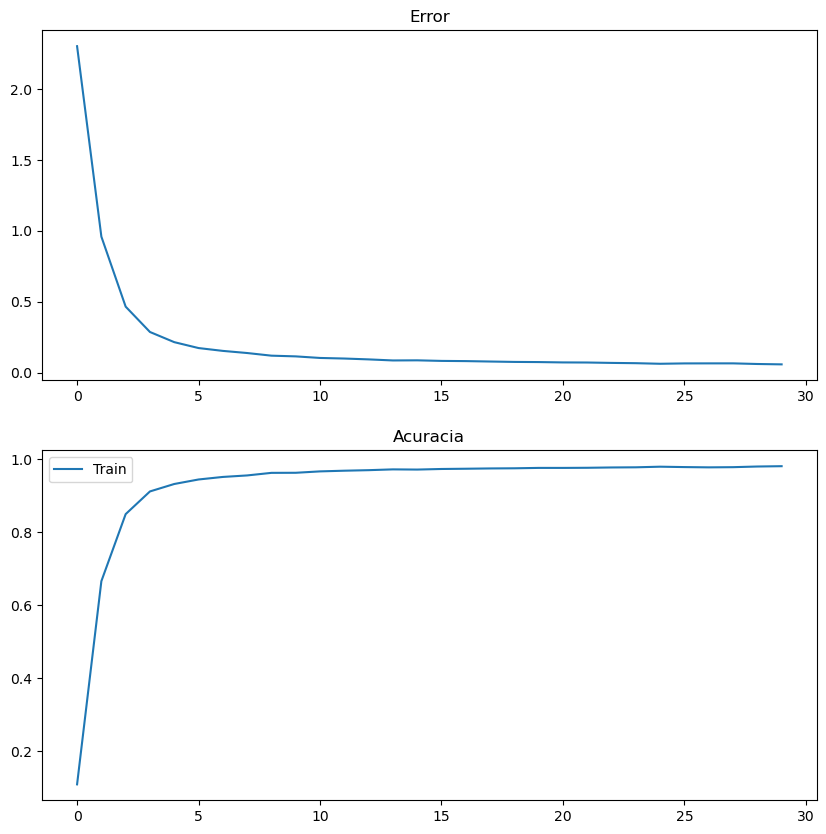

In [81]:
fig, graph_axis = plt.subplots(2, 1, figsize=(10,10))

graph_axis[0].plot(history.history['loss'])
graph_axis[0].title.set_text('Error')

graph_axis[1].plot(history.history['accuracy'])
graph_axis[1].title.set_text('Acuracia')
graph_axis[1].legend(['Train', 'Val'])

In [77]:
model = models.Sequential()

model.add(layers.Conv2D(6, 5, activation=tf.nn.gelu, input_shape=x_train.shape[1:]))

model.add(layers.AveragePooling2D(2))

model.add(layers.Activation('sigmoid'))

model.add(layers.Conv2D(16, 5, activation=tf.nn.gelu))

model.add(layers.AveragePooling2D(2))

model.add(layers.Activation('sigmoid'))

model.add(layers.Conv2D(120, 5, activation=tf.nn.gelu))

model.add(layers.Flatten())

model.add(layers.Dense(84, activation=tf.nn.gelu))

model.add(layers.Dense(10, activation='softmax'))

In [78]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=64, epochs=30, validation_data=(x_val, y_val))

Epoch 1/30
907/907 [==============================] - 39s 40ms/step - loss: 2.3024 - accuracy: 0.1084 - val_loss: 2.2016 - val_accuracy: 0.1980
Epoch 2/30
907/907 [==============================] - 33s 37ms/step - loss: 0.9599 - accuracy: 0.6660 - val_loss: 0.4617 - val_accuracy: 0.8435
Epoch 3/30
907/907 [==============================] - 34s 38ms/step - loss: 0.4663 - accuracy: 0.8500 - val_loss: 0.2771 - val_accuracy: 0.9260
Epoch 4/30
907/907 [==============================] - 40s 44ms/step - loss: 0.2876 - accuracy: 0.9122 - val_loss: 0.1729 - val_accuracy: 0.9485
Epoch 5/30
907/907 [==============================] - 35s 39ms/step - loss: 0.2160 - accuracy: 0.9327 - val_loss: 0.1362 - val_accuracy: 0.9625
Epoch 6/30
907/907 [==============================] - 33s 36ms/step - loss: 0.1744 - accuracy: 0.9450 - val_loss: 0.1260 - val_accuracy: 0.9625
Epoch 7/30
907/907 [==============================] - 36s 40ms/step - loss: 0.1544 - accuracy: 0.9520 - val_loss: 0.0968 - val_accuracy:

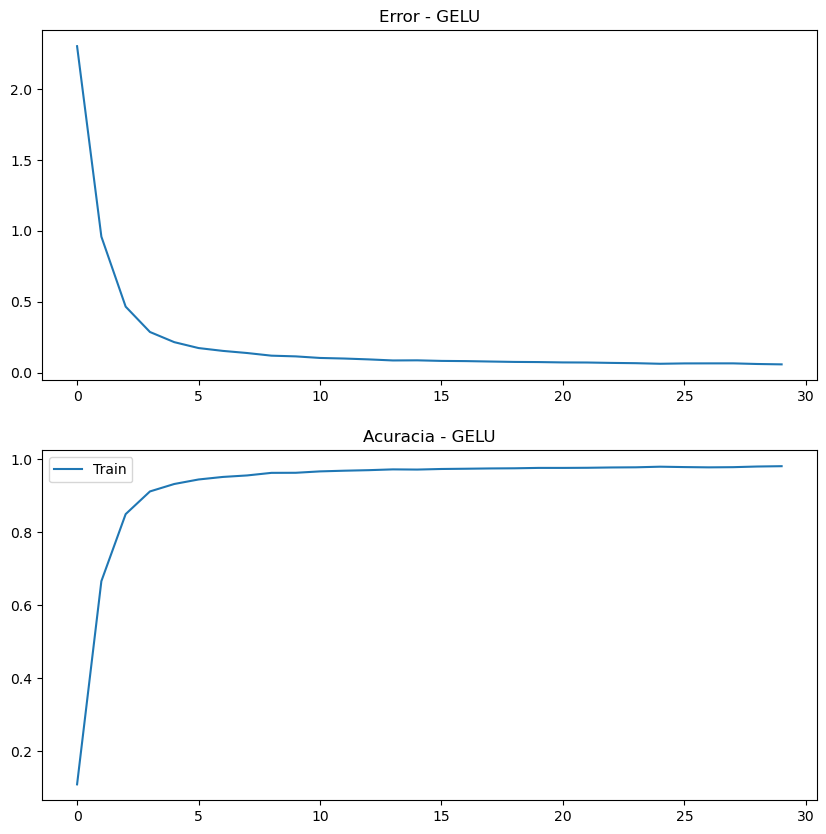

In [83]:
fig, graph_axis = plt.subplots(2, 1, figsize=(10,10))

graph_axis[0].plot(history.history['loss'])
graph_axis[0].title.set_text('Error - GELU')

graph_axis[1].plot(history.history['accuracy'])
graph_axis[1].title.set_text('Acuracia - GELU')
graph_axis[1].legend(['Train', 'Val'])